# Предварительная обработка данных.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

1 Загрузите и прочитайте в pandas приложенный датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится (рис.1), необходимо его обработать.

In [ ]:
df = pd.read_csv('cars_sampled.csv',parse_dates=['dateCrawled','dateCreated'])
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,7/4/2016 4:44
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,26/03/2016 13:17
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,1/4/2016 8:40
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,7/4/2016 4:44
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2016-03-04 15:48:00,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,2016-03-04,29690,5/4/2016 15:16
49997,2016-03-27 14:55:00,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,2016-03-27,50181,7/4/2016 11:45
49998,2016-03-14 18:51:00,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,2016-03-14,86956,25/03/2016 6:17
49999,2016-03-15 18:06:00,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,2016-03-15,65232,6/4/2016 17:15


2 Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [ ]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [ ]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                      int64
lastSeen                       object
dtype: object

In [ ]:
df.nunique()

dateCrawled            12039
name                   38766
seller                     2
offerType                  2
price                   2393
abtest                     2
vehicleType                8
yearOfRegistration        97
gearbox                    2
powerPS                  460
model                    248
kilometer                 13
monthOfRegistration       13
fuelType                   7
brand                     40
notRepairedDamage          2
dateCreated               75
postalCode              7018
lastSeen               10413
dtype: int64

In [ ]:
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

## фильтровка данных

In [ ]:
q5 = np.percentile (df.price, 5)
q5

200.0

In [ ]:
q95 = np.percentile (df.price, 95)
q95

19650.0

In [ ]:
df = df.query('price > 200 & price < 19608')

In [ ]:
q5 = np.percentile (df.yearOfRegistration, 5)
q5

1993.0

In [ ]:
q95 = np.percentile (df.yearOfRegistration, 95)
q95

2016.0

In [ ]:
df.yearOfRegistration.min()

1000

In [ ]:
df = df.query('yearOfRegistration >= 1993 & yearOfRegistration <= 2016')

In [ ]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,7/4/2016 4:44
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,26/03/2016 13:17
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,1/4/2016 8:40
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,7/4/2016 4:44
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,2016-10-03 23:36:00,BMW_X3_3.0i,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no,2016-10-03,96152,6/4/2016 2:17
49992,2016-03-14 13:57:00,Opel_Astra_2.0_DI_Elegance,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no,2016-03-14,99310,31/03/2016 0:45
49993,2016-03-14 11:37:00,Renault_Clio_mit_Servolenkung_und_neuem_TÜV!,private,offer,830,test,small car,1999,manual,60,clio,125000,8,petrol,renault,no,2016-03-14,33659,22/03/2016 4:47
49995,2016-03-23 21:45:00,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,3,petrol,opel,no,2016-03-23,27305,4/4/2016 1:47


## замена пропущенных значений

In [ ]:
df.notRepairedDamage = df.notRepairedDamage.fillna('no')

In [ ]:
x = df.vehicleType.mode()[0]
df.vehicleType = df.vehicleType.fillna(x)

In [ ]:
x = df.gearbox.mode()[0]
df.gearbox = df.gearbox.fillna(x)

In [ ]:
x = df.fuelType.mode()[0]
df.fuelType = df.fuelType.fillna(x)

In [ ]:
x = df.model.mode()[0]
df.model = df.model.fillna(x)

In [ ]:
df.gearbox.mode()[0]

'manual'

In [ ]:
df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

3 Поработайте с типами переменных. Все числовые значения переведите в формат int.

In [ ]:
# все числовые значения в формате int

4 Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

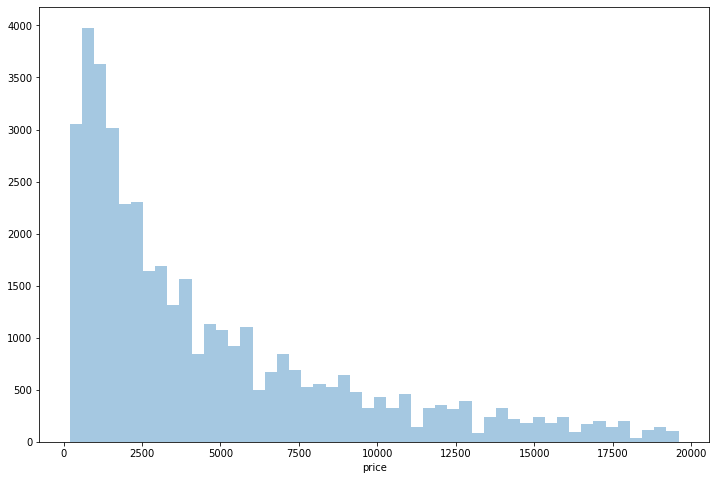

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df.price,kde=False)

In [ ]:
df['log_price'] = np.log(df['price'])

<AxesSubplot:xlabel='log_price'>

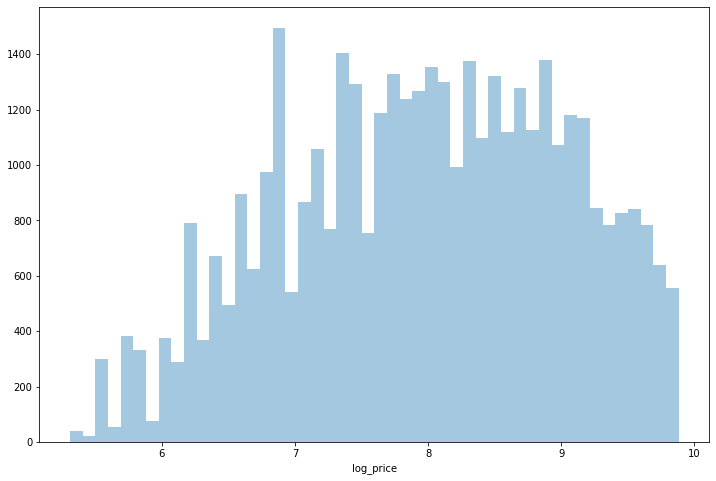

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df.query('log_price < 100000 & log_price > -100000').log_price,kde=False)

<AxesSubplot:>

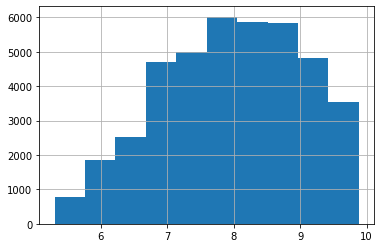

In [ ]:
df.query('log_price < 100000 & log_price > -100000').log_price.hist()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

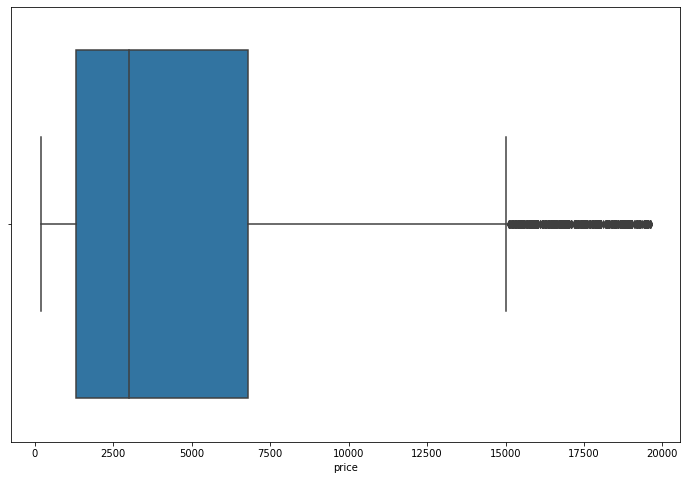

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df.price)

In [ ]:
#df.price.max()

In [ ]:
#df.query('price < 2795000').price.max()

In [ ]:
#df = df.query('price < 9999999')

In [ ]:
#plt.figure(figsize=(12,8))
#sns.boxplot(df.price)

In [ ]:
#plt.figure(figsize=(12,8))
#sns.distplot(df.query('log_price < 1000000 & log_price > -1000000').log_price,kde=False)

5 Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

In [ ]:
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,log_price
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,no,2016-03-30,20257,7/4/2016 4:44,8.400659
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,26/03/2016 13:17,9.495444
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,no,2016-03-31,27449,1/4/2016 8:40,8.070906
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,7/4/2016 4:44,8.411833
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,1/4/2016 23:18,9.838949


In [ ]:
df.nunique()

dateCrawled            11576
name                   31023
seller                     2
offerType                  1
price                   1586
abtest                     2
vehicleType                8
yearOfRegistration        24
gearbox                    2
powerPS                  381
model                    243
kilometer                 13
monthOfRegistration       13
fuelType                   7
brand                     40
notRepairedDamage          2
dateCreated               70
postalCode              6751
lastSeen                9624
log_price               1586
dtype: int64

In [ ]:
df.seller.unique()

array(['private', 'commercial'], dtype=object)

## переформатирование строковых в инт

In [ ]:
df['sel_private'] = np.where(df.seller == "commercial", 0, 1)

In [ ]:
#df['offerType_type'] = np.where(df.offerType == "offer", 0, 1)

In [ ]:
df_new = df.query('seller == "commercial"').sel_private-1

In [ ]:
df['abtest_type'] = np.where(df.abtest == "test", 0, 1)

In [ ]:
df['gearbox_type'] = np.where(df.gearbox == "manual", 0, 1)

In [ ]:
df['notRepairedDamage_type'] = np.where(df.notRepairedDamage == "no", 0, 1)

In [ ]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,log_price,sel_private,abtest_type,gearbox_type,notRepairedDamage_type
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,...,bmw,no,2016-03-30,20257,7/4/2016 4:44,8.400659,1,0,0,0
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,...,volvo,no,2016-07-03,88045,26/03/2016 13:17,9.495444,1,1,0,0
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,...,volkswagen,no,2016-03-31,27449,1/4/2016 8:40,8.070906,1,0,0,0
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,...,seat,no,2016-03-19,34537,7/4/2016 4:44,8.411833,1,1,0,0
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,...,volvo,no,2016-03-16,55270,1/4/2016 23:18,9.838949,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,2016-10-03 23:36:00,BMW_X3_3.0i,private,offer,10900,test,limousine,2004,manual,231,...,bmw,no,2016-10-03,96152,6/4/2016 2:17,9.296518,1,0,0,0
49992,2016-03-14 13:57:00,Opel_Astra_2.0_DI_Elegance,private,offer,790,test,limousine,1998,manual,82,...,opel,no,2016-03-14,99310,31/03/2016 0:45,6.672033,1,0,0,0
49993,2016-03-14 11:37:00,Renault_Clio_mit_Servolenkung_und_neuem_TÜV!,private,offer,830,test,small car,1999,manual,60,...,renault,no,2016-03-14,33659,22/03/2016 4:47,6.721426,1,0,0,0
49995,2016-03-23 21:45:00,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,2290,test,station wagon,2001,manual,101,...,opel,no,2016-03-23,27305,4/4/2016 1:47,7.736307,1,0,0,0


In [ ]:
df.nunique()

dateCrawled               11576
name                      31023
seller                        2
offerType                     1
price                      1586
abtest                        2
vehicleType                   8
yearOfRegistration           24
gearbox                       2
powerPS                     381
model                       243
kilometer                    13
monthOfRegistration          13
fuelType                      7
brand                        40
notRepairedDamage             2
dateCreated                  70
postalCode                 6751
lastSeen                   9624
log_price                  1586
sel_private                   2
abtest_type                   2
gearbox_type                  2
notRepairedDamage_type        2
dtype: int64

In [ ]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode,log_price,sel_private,abtest_type,gearbox_type,notRepairedDamage_type
price,1.000000,0.600032,0.138229,-0.368090,0.084135,0.065477,0.886778,0.003998,-0.002517,0.257620,-0.181816
yearOfRegistration,0.600032,1.000000,0.032381,-0.393015,0.028395,0.030180,0.613645,-0.002283,-0.005469,0.044793,-0.097591
powerPS,0.138229,0.032381,1.000000,0.008250,0.023338,0.012819,0.139505,0.001720,-0.003247,0.102657,-0.013199
kilometer,-0.368090,-0.393015,0.008250,1.000000,-0.012988,-0.005608,-0.321965,-0.002838,0.003636,0.018724,0.068371
monthOfRegistration,0.084135,0.028395,0.023338,-0.012988,1.000000,0.008928,0.116878,-0.005518,-0.001681,0.038151,-0.044568
postalCode,0.065477,0.030180,0.012819,-0.005608,0.008928,1.000000,0.067309,0.008287,-0.004327,-0.036593,0.007533
log_price,0.886778,0.613645,0.139505,-0.321965,0.116878,0.067309,1.000000,0.004519,0.000693,0.244844,-0.245508
sel_private,0.003998,-0.002283,0.001720,-0.002838,-0.005518,0.008287,0.004519,1.000000,0.004775,0.002430,0.001597
abtest_type,-0.002517,-0.005469,-0.003247,0.003636,-0.001681,-0.004327,0.000693,0.004775,1.000000,-0.005683,0.004930
gearbox_type,0.257620,0.044793,0.102657,0.018724,0.038151,-0.036593,0.244844,0.002430,-0.005683,1.000000,-0.012746


In [ ]:
#np.corrcoef(x=df.price, y = [df.yearOfRegistration,df.powerPS])

<AxesSubplot:>

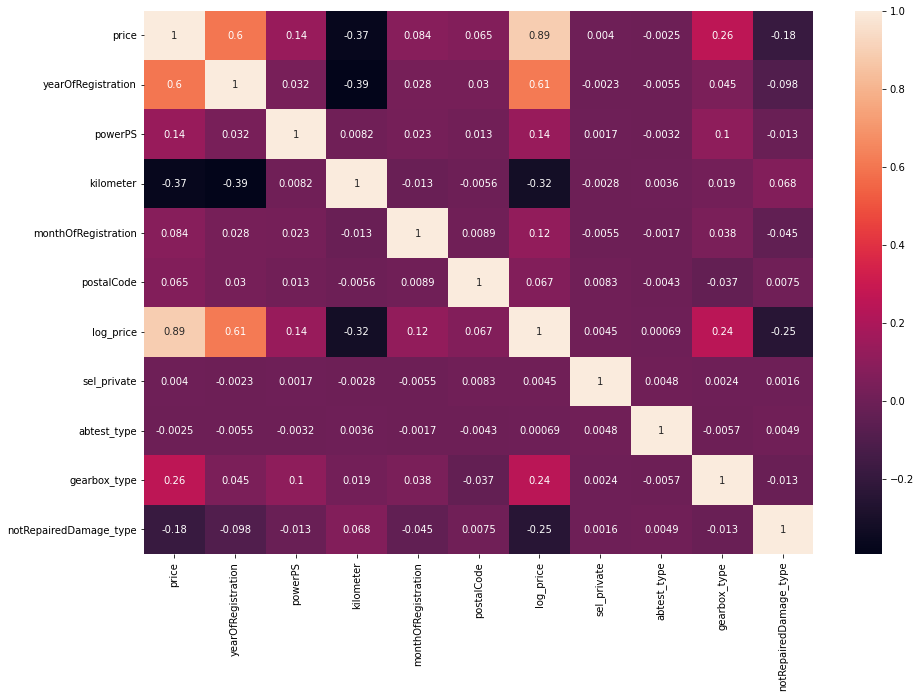

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

из таблицы корреляций можно сделать вывод, что важными являются yearOfRegistration, powerPS, kilometer, gearbox_type, notRepairedDamage_type

6 Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

<AxesSubplot:xlabel='fuelType', ylabel='price'>

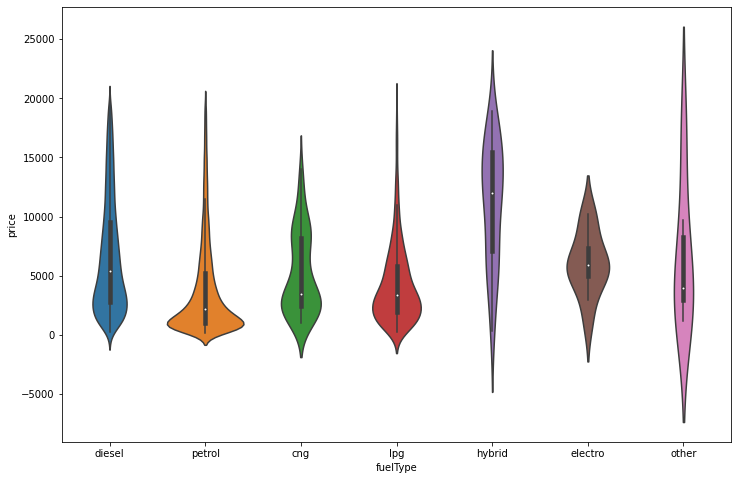

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x="fuelType", y="price", data=df)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

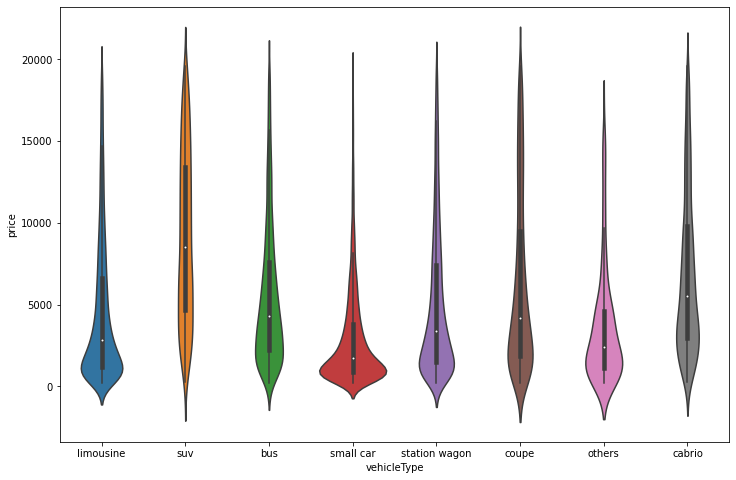

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x="vehicleType", y="price", data=df)

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

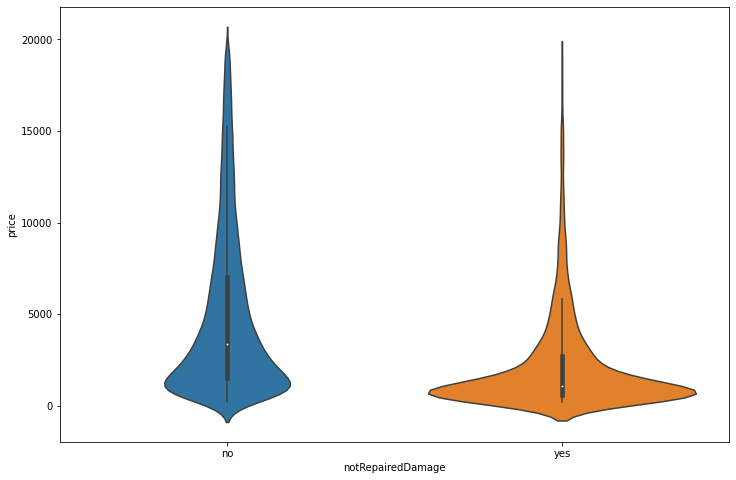

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x="notRepairedDamage", y="price", data=df)

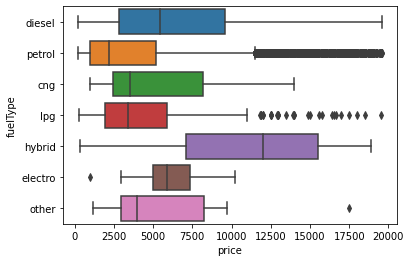

In [ ]:
sns.boxplot(
data=df,
x='price',
y='fuelType'
)

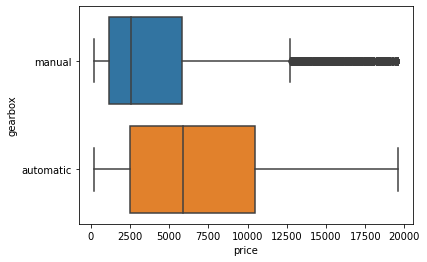

In [ ]:
sns.boxplot(
data=df,
x='price',
y='gearbox'
)

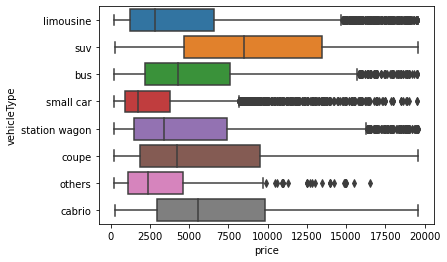

In [ ]:
sns.boxplot(
data=df,
x='price',
y='vehicleType'
)

<AxesSubplot:xlabel='price', ylabel='notRepairedDamage'>

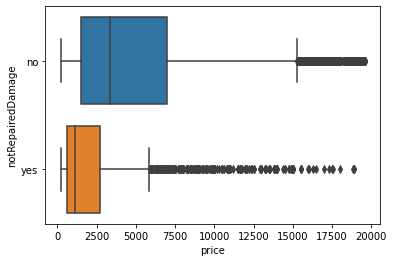

In [ ]:
sns.boxplot(
data=df,
x='price',
y='notRepairedDamage'
)

# построение модели регрессии

In [ ]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,log_price,sel_private,abtest_type,gearbox_type,notRepairedDamage_type
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,...,bmw,no,2016-03-30,20257,7/4/2016 4:44,8.400659,1,0,0,0
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,...,volvo,no,2016-07-03,88045,26/03/2016 13:17,9.495444,1,1,0,0
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,...,volkswagen,no,2016-03-31,27449,1/4/2016 8:40,8.070906,1,0,0,0
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,...,seat,no,2016-03-19,34537,7/4/2016 4:44,8.411833,1,1,0,0
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,...,volvo,no,2016-03-16,55270,1/4/2016 23:18,9.838949,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,2016-10-03 23:36:00,BMW_X3_3.0i,private,offer,10900,test,limousine,2004,manual,231,...,bmw,no,2016-10-03,96152,6/4/2016 2:17,9.296518,1,0,0,0
49992,2016-03-14 13:57:00,Opel_Astra_2.0_DI_Elegance,private,offer,790,test,limousine,1998,manual,82,...,opel,no,2016-03-14,99310,31/03/2016 0:45,6.672033,1,0,0,0
49993,2016-03-14 11:37:00,Renault_Clio_mit_Servolenkung_und_neuem_TÜV!,private,offer,830,test,small car,1999,manual,60,...,renault,no,2016-03-14,33659,22/03/2016 4:47,6.721426,1,0,0,0
49995,2016-03-23 21:45:00,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,2290,test,station wagon,2001,manual,101,...,opel,no,2016-03-23,27305,4/4/2016 1:47,7.736307,1,0,0,0


In [ ]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode,log_price,sel_private,abtest_type,gearbox_type,notRepairedDamage_type
price,1.000000,0.600032,0.138229,-0.368090,0.084135,0.065477,0.886778,0.003998,-0.002517,0.257620,-0.181816
yearOfRegistration,0.600032,1.000000,0.032381,-0.393015,0.028395,0.030180,0.613645,-0.002283,-0.005469,0.044793,-0.097591
powerPS,0.138229,0.032381,1.000000,0.008250,0.023338,0.012819,0.139505,0.001720,-0.003247,0.102657,-0.013199
kilometer,-0.368090,-0.393015,0.008250,1.000000,-0.012988,-0.005608,-0.321965,-0.002838,0.003636,0.018724,0.068371
monthOfRegistration,0.084135,0.028395,0.023338,-0.012988,1.000000,0.008928,0.116878,-0.005518,-0.001681,0.038151,-0.044568
postalCode,0.065477,0.030180,0.012819,-0.005608,0.008928,1.000000,0.067309,0.008287,-0.004327,-0.036593,0.007533
log_price,0.886778,0.613645,0.139505,-0.321965,0.116878,0.067309,1.000000,0.004519,0.000693,0.244844,-0.245508
sel_private,0.003998,-0.002283,0.001720,-0.002838,-0.005518,0.008287,0.004519,1.000000,0.004775,0.002430,0.001597
abtest_type,-0.002517,-0.005469,-0.003247,0.003636,-0.001681,-0.004327,0.000693,0.004775,1.000000,-0.005683,0.004930
gearbox_type,0.257620,0.044793,0.102657,0.018724,0.038151,-0.036593,0.244844,0.002430,-0.005683,1.000000,-0.012746


In [ ]:
X = df[['yearOfRegistration','powerPS','kilometer','notRepairedDamage_type','gearbox_type']]
Y = df.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=100)
model = LinearRegression().fit(X_train, y_train)

In [ ]:
r2_score(y_test, model.predict(X_test))

0.464745163649143

In [ ]:
mean_absolute_error(y_test, model.predict(X_test)) # сумма всех отклонений

2315.8377680287035

In [ ]:
mean_squared_error(y_test, model.predict(X_test))

10698240.827583285

In [ ]:
10698240**0.5 # RMSE

3270.8164118458253